# 关联规则

In [2]:
%matplotlib inline
import pandas as pd
from Apriori import *
import matplotlib.pyplot as plt

## 数据载入

原数据为倒排表数据

In [3]:
inverted=pd.read_csv('Prod.csv',encoding='gbk')
inverted.head()

,ID,PROD
0,30924038,和动漫
1,30924038,本地通话
2,30924038,来电提醒
3,30924038,飞信
4,30924062,和动漫


## 数据转换

倒排表数据转换为相应的二维列表数据

In [4]:
idataset=dataconvert(inverted,tidvar='ID',itemvar='PROD',data_type = 'inverted')
idataset[:5]

inverted index type dataSet


[['MM'],
 ['国内长途'],
 ['国内漫游', '国内长途', '彩铃', '本地通话', '短信回执'],
 ['国内长途'],
 ['国内长途', '本地通话']]

## 关联规则

参数说明:

+ minSupport:最小支持度阈值
+ minConf:最小置信度阈值
+ minlen:规则最小长度
+ maxlen:规则最大长度

这里，minSupport或minConf设定越低，产生的规则越多，计算量也就越大

设定参数为:minSupport=0.05,minConf=0.5,minlen=1,maxlen=10

In [5]:
res = arules(idataset,minSupport=0.05,minConf=0.5,minlen=1,maxlen=10)

frozenset({'和视界'}) --> frozenset({'国内长途'}) conf: 0.676923076923077
frozenset({'和视界'}) --> frozenset({'本地通话'}) conf: 0.7999999999999999
frozenset({'手机报'}) --> frozenset({'本地通话'}) conf: 0.75
frozenset({'咪咕阅读'}) --> frozenset({'国内长途'}) conf: 0.553191489361702
frozenset({'来电提醒'}) --> frozenset({'国内长途'}) conf: 0.5180722891566265
frozenset({'咪咕阅读'}) --> frozenset({'本地通话'}) conf: 0.7659574468085106
frozenset({'和动漫'}) --> frozenset({'咪咕阅读'}) conf: 0.6545454545454545
frozenset({'咪咕阅读'}) --> frozenset({'来电提醒'}) conf: 0.7978723404255319
frozenset({'来电提醒'}) --> frozenset({'咪咕阅读'}) conf: 0.9036144578313253
frozenset({'和动漫'}) --> frozenset({'本地通话'}) conf: 0.8363636363636362
frozenset({'来电提醒'}) --> frozenset({'本地通话'}) conf: 0.7590361445783131
frozenset({'和动漫'}) --> frozenset({'来电提醒'}) conf: 0.7090909090909091
frozenset({'咪咕音乐'}) --> frozenset({'本地通话'}) conf: 0.7647058823529412
frozenset({'国内漫游'}) --> frozenset({'国内长途'}) conf: 0.5965909090909092
frozenset({'本地通话'}) --> frozenset({'国内长途'}) conf: 0.5949

## 产生关联规则

+ 规定提升度要大于1,并按照置信度进行排序

In [6]:
res.loc[res.lift>1,:].sort_values('support',ascending=False).head(20)

,lhs,,rhs,support,confidence,lift
14,(本地通话),==>,(国内长途),0.422222,0.594912,1.409002
15,(国内长途),==>,(本地通话),0.422222,0.677060,1.603563
16,(国内漫游),==>,(本地通话),0.200000,0.818182,4.090909
13,(国内漫游),==>,(国内长途),0.145833,0.596591,4.090909
12,(咪咕音乐),==>,(本地通话),0.108333,0.764706,7.058824
7,(咪咕阅读),==>,(来电提醒),0.104167,0.797872,7.659574
8,(来电提醒),==>,(咪咕阅读),0.104167,0.903614,8.674699
5,(咪咕阅读),==>,(本地通话),0.100000,0.765957,7.659574
19,(短信回执),==>,(本地通话),0.098611,0.806818,8.181818
10,(来电提醒),==>,(本地通话),0.087500,0.759036,8.674699


## 关联规则结果汇总

Text(0, 0.5, 'confidence')

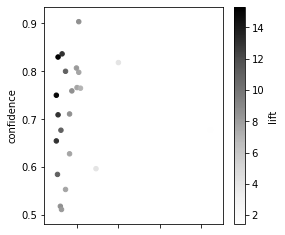

In [7]:
res.plot.scatter(3,4,c=5,figsize=(4,4))
plt.xlabel('support')
plt.ylabel('confidence')